In [2]:
try:
    import numpy as np
    from sklearn.svm import SVR
    import matplotlib.pyplot as plt
    import random
except:
    !pip install numpy
    !pip install matplotlib
    !pip install scikit-learn


In [13]:

X = np.sort(5 * np.random.rand(40, 1), axis=0)
# y = np.sin(X).ravel()
y = X.ravel()
y

array([0.24719735, 0.54647127, 0.65747   , 0.75548621, 0.97410648,
       1.37311797, 1.43158569, 1.58708881, 1.93111867, 1.94807606,
       2.01185048, 2.0510698 , 2.10891173, 2.28531646, 2.29782563,
       2.34071408, 2.38451295, 2.77106689, 2.93319478, 3.10291773,
       3.14241521, 3.24256791, 3.41778949, 3.68326835, 3.78263377,
       3.93814628, 3.95145453, 3.97353883, 4.03554463, 4.07436171,
       4.09446527, 4.11874424, 4.13799832, 4.1841689 , 4.31853058,
       4.50985711, 4.62209891, 4.66461771, 4.76806839, 4.92010679])

In [14]:
# add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))
y

array([1.19000061, 0.54647127, 0.65747   , 0.75548621, 0.97410648,
       2.75629437, 1.43158569, 1.58708881, 1.93111867, 1.94807606,
       0.61123419, 2.0510698 , 2.10891173, 2.28531646, 2.29782563,
       0.8939284 , 2.38451295, 2.77106689, 2.93319478, 3.10291773,
       2.56585325, 3.24256791, 3.41778949, 3.68326835, 3.78263377,
       4.74591999, 3.95145453, 3.97353883, 4.03554463, 4.07436171,
       3.46403444, 4.11874424, 4.13799832, 4.1841689 , 4.31853058,
       3.26291256, 4.62209891, 4.66461771, 4.76806839, 4.92010679])

In [15]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

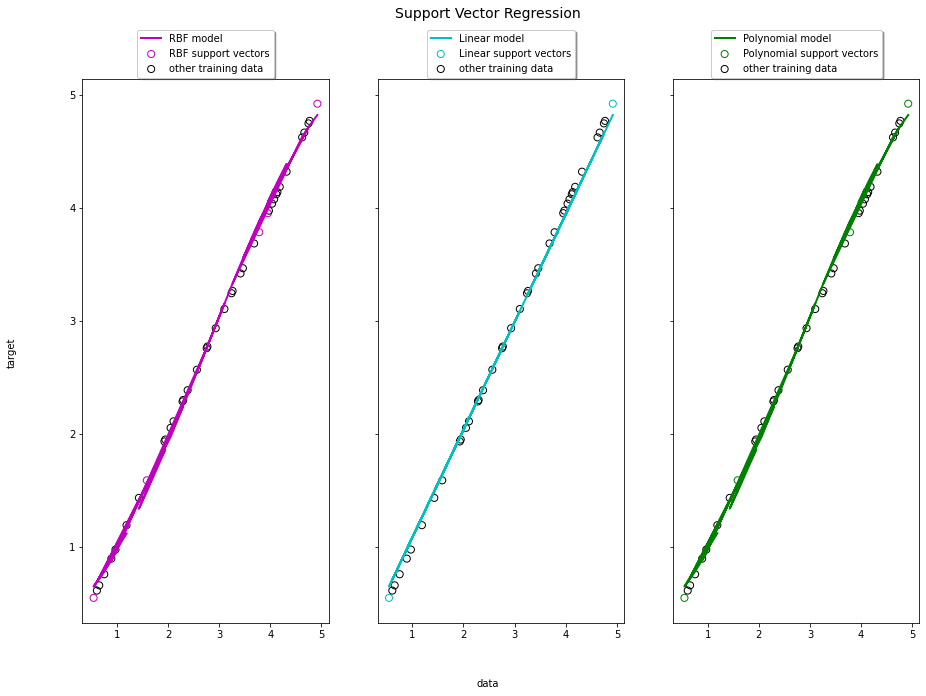

In [16]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [ ]:
input = First_three_car()


